In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# from ipywidgets import interact#, interactive, fixed, interact_manual
# from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot  # https://github.com/NelisW/pyradi
%matplotlib inline

import network

In [27]:

nonlin = 'tansig'
nonlin = 'sigmoid'
if nonlin == 'sigmoid':
    nlfn=network.sigmoid
    nlfnpr=network.sigmoid_prime
    ymin = 0
    dymax = 0.25
else:
    nlfn=network.tansig
    nlfnpr=network.tansig_prime
    ymin = -1
    dymax = 1


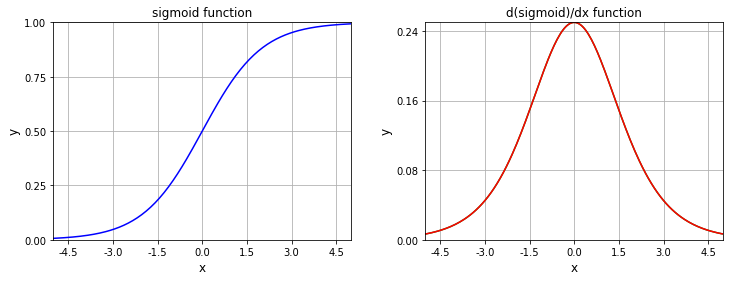

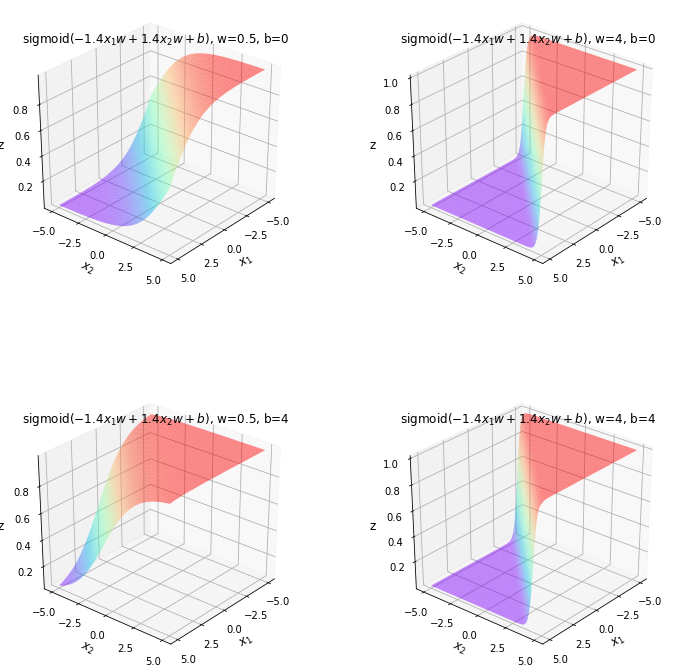

In [28]:
xts = np.linspace(-5,5,200)
yts = np.linspace(-5,5,200)
varxts, varyts = np.meshgrid(xts, yts)

p = ryplot.Plotter(1,1,2,figsize=(12,4),doWarning=False)
p.plot(1,xts,nlfn(xts),f'{nonlin} function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-5,5,ymin,1]);
p.plot(2,xts,nlfnpr(xts),f'd({nonlin}) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-5,5,0,dymax]);
p.plot(2,xts,np.gradient(nlfn(xts),xts),f'd({nonlin})/dx function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-5,5,0,dymax]);
p.saveFig(f'../pic/{nonlin}01.pdf')

q = ryplot.Plotter(2,2,2,figsize=(12,12),doWarning=False)

for i,(w,b,) in enumerate(zip([0.5,4,0.5,4],[0,0,4,4])):
    ptit = f'{nonlin}($-1.4x_1w+1.4x_2w+b$), w={w}, b={b}'
    ts = nlfn(-1.4*varxts * w + 1.4*varyts * w + b)
    q.mesh3D(1+i, varxts, varyts, ts, ptitle=ptit, xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
          plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
          drawGrid=True, cbarshow=False, alpha=0.5,azim=40);

q.saveFig(f'../pic/{nonlin}02.pdf')
